In [1]:
''' 
Unnormalized
Normalized
Feature engineering
'''

''' 
Notes:
- since only looking at 2012-15, can just do cross-val. Don't expect temporal differences
(as opposed to if training from 1950-2023, where causal differences in league)
- only care about ranking current prospects, not how metrics generalize to unseen prospects.
so no need for test set 
'''

" \nNotes:\n- since only looking at 2012-15, can just do cross-val. Don't expect temporal differences\n(as opposed to if training from 1950-2023, where causal differences in league)\n- only care about ranking current prospects, not how metrics generalize to unseen prospects.\nso no need for test set \n"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [4]:
import xgboost as xgb

In [5]:
dataset = pd.read_csv("data/tree_data.csv", index_col=0)


In [6]:
dataset

,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,Success
10018,0.264885,DT,74.88,293.0,23.4,4.79,31.500,9.375,76.375,1.68,2.79,7.23,29.0,9.02,4.37,NaN,29.0,0.5652,0
10034,0.126573,OT,79.63,308.0,22.2,5.10,33.000,10.625,80.125,1.78,2.95,7.62,30.0,9.05,4.68,NaN,33.0,0.5600,0
10081,0.353101,DT,75.88,336.0,21.3,5.28,33.125,10.125,79.625,1.90,3.03,7.62,24.5,NaN,4.82,NaN,19.0,0.9412,1
10085,0.172083,QB,78.88,242.0,21.5,4.92,33.875,9.875,79.375,1.73,2.87,NaN,NaN,NaN,NaN,NaN,NaN,0.7576,0
10100,0.163254,DE,75.38,284.0,21.7,4.76,35.500,9.625,80.375,1.74,2.77,7.16,34.5,9.10,4.40,NaN,25.0,0.5750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99856,0.158457,WR,72.25,189.0,22.8,4.45,33.000,9.625,78.750,1.59,2.56,6.91,36.5,10.03,4.33,NaN,11.0,0.6774,0
99900,0.332741,RB,73.25,226.0,21.6,4.54,31.625,9.000,75.875,1.61,2.64,7.19,36.0,9.09,4.22,11.66,22.0,0.4595,0
99916,0.265140,TE,76.13,267.0,22.9,4.70,34.500,10.125,82.000,1.72,2.79,7.08,33.5,9.11,4.53,11.73,31.0,0.8333,1
99968,0.111176,ILB,74.00,230.0,22.3,4.67,31.625,9.375,74.750,1.62,2.67,7.01,29.0,9.07,4.34,12.00,22.0,0.6512,0


In [7]:
X = dataset.drop(["Score", "Success"],axis=1)
y = dataset['Score']

In [8]:
X.head()

,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%
10018,DT,74.88,293.0,23.4,4.79,31.500,9.375,76.375,1.68,2.79,7.23,29.0,9.02,4.37,NaN,29.0,0.5652
10034,OT,79.63,308.0,22.2,5.10,33.000,10.625,80.125,1.78,2.95,7.62,30.0,9.05,4.68,NaN,33.0,0.5600
10081,DT,75.88,336.0,21.3,5.28,33.125,10.125,79.625,1.90,3.03,7.62,24.5,NaN,4.82,NaN,19.0,0.9412
10085,QB,78.88,242.0,21.5,4.92,33.875,9.875,79.375,1.73,2.87,NaN,NaN,NaN,NaN,NaN,NaN,0.7576
10100,DE,75.38,284.0,21.7,4.76,35.500,9.625,80.375,1.74,2.77,7.16,34.5,9.10,4.40,NaN,25.0,0.5750


In [9]:
X["ProPosition"] = X["ProPosition"].astype("category")

In [10]:
X.dtypes

ProPosition      category
Hgt               float64
Wgt               float64
Age               float64
Forty             float64
Arm               float64
Hand              float64
Wing              float64
TenYard           float64
TwentyYard        float64
ThreeCone         float64
VJ                float64
BJ                float64
TwentyShuttle     float64
SixtyShuttle      float64
BP                float64
Test_Acc%         float64
dtype: object

In [12]:
classify = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classify, X, dataset['Success'], cv=kfold)

In [13]:
scores

array([0.65517241, 0.66435986, 0.62629758, 0.61591696, 0.67474048])

In [33]:
clf = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)
# X is the dataframe we created in previous snippet
clf.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
predictions = clf.predict(X)

In [35]:
predictions

array([0.26193863, 0.12502399, 0.3490637 , ..., 0.2594497 , 0.12359383,
       0.25821626], dtype=float32)

In [42]:
from xgboost import plot_importance

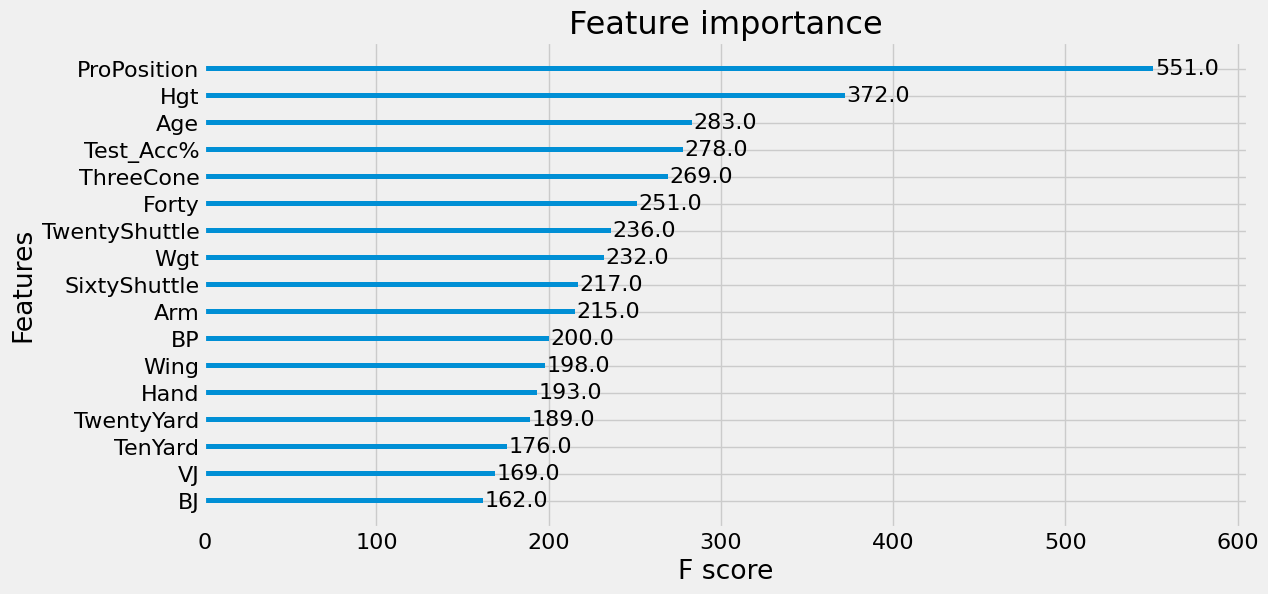

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(clf, max_num_features=18, ax=ax)
plt.show()

In [40]:
clf.feature_importances_

(17,)

In [ ]:
''' How to handle categorical data in Random Forest'''

In [22]:
random_forest_clf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, 
                                          min_samples_split=2, min_samples_leaf=1, bootstrap=True, oob_score=True)

In [23]:
random_forest_clf.fit(X, y)

ValueError: could not convert string to float: 'QB'

In [5]:
measurables

,PlayerId,DraftSeason,CollegePosition,ProPosition,FirstName,LastName,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,Test,TestAttempt,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,BodyFat,LeanMass,IndyInvite
0,48418,2013,DC,DC,MARK,FOLKERTS,72.25,191,23.7,4.63,31.750,8.875,74.750,13.0,26.0,1.64,2.68,7.15,NaN,NaN,4.52,12.10,2.0,NaN,NaN,N
1,56191,2012,WR,WR,JOSHUA,HARLEY,75.13,219,22.2,4.50,34.125,10.125,81.625,21.0,50.0,1.57,2.57,6.95,36.5,10.05,4.14,11.28,19.0,6.4,202.883,Y
2,70345,2012,DS,DS,GERALD,BLACK,70.50,209,23.1,4.74,31.625,9.250,73.000,23.0,40.0,1.68,2.72,7.18,36.0,10.01,4.50,NaN,21.0,NaN,NaN,N
3,18539,2012,DS,DS,PATRICK,BRIDGES,73.63,208,24.0,4.67,31.500,9.375,75.000,17.0,49.0,1.71,2.74,7.20,33.5,10.03,4.41,12.20,11.0,NaN,NaN,N
4,16287,2013,RB,RB,NIHJA,SINGLETARY,71.00,230,22.9,4.60,31.000,9.500,73.500,17.0,35.0,1.67,2.66,7.33,33.5,9.07,4.54,11.77,NaN,14.0,198.952,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,36680,2012,OG,OG,JOHN,HARRIS,73.63,316,21.5,5.30,31.875,9.750,77.500,NaN,NaN,1.83,3.03,7.83,27.0,7.09,4.74,NaN,25.0,NaN,NaN,N
5448,59855,2013,WR,WR,JORDAN,LANARIS,74.00,203,23.2,4.54,33.250,9.000,79.250,20.0,29.0,1.70,2.74,7.31,33.0,9.05,4.54,11.80,16.0,NaN,NaN,N
5449,35356,2013,DT,DT,VAUGHN,GARCIA,74.75,287,23.2,5.17,32.250,10.125,77.750,22.0,28.0,1.69,2.97,7.52,27.5,8.05,4.65,NaN,32.0,NaN,NaN,N
5450,64908,2014,WR,WR,COREY,UNDERWOOD,73.13,212,22.7,4.56,32.250,9.250,78.500,17.0,23.0,1.62,2.70,7.33,NaN,9.01,4.56,12.30,12.0,NaN,NaN,N
